In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df=pd.read_csv('DailyDelhiClimateTrain.csv')

In [5]:
df.head()

date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [7]:
# date stünu object onu tarihe çevirmemiz gerekiyor

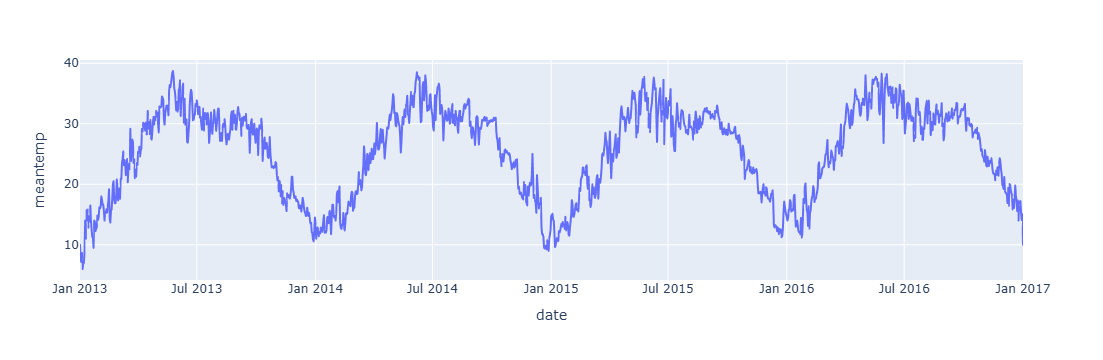

In [8]:
figure=px.line(df,x='date',y='meantemp')
figure.show()

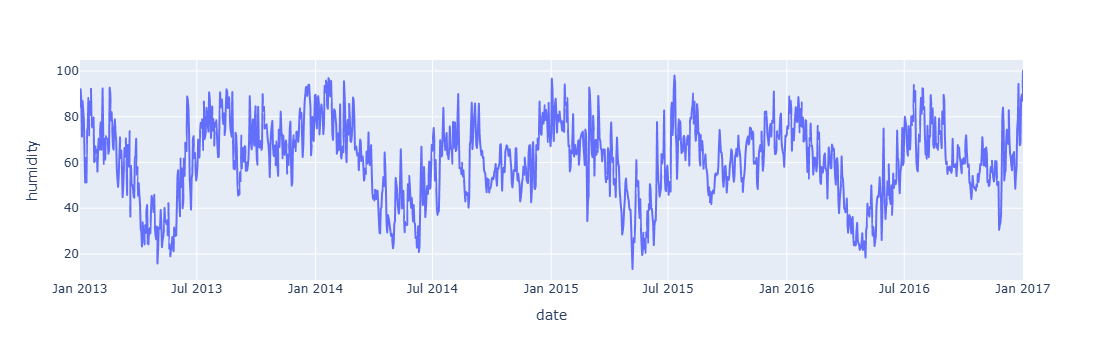

In [9]:
figure=px.line(df,x='date',y='humidity')
figure.show()

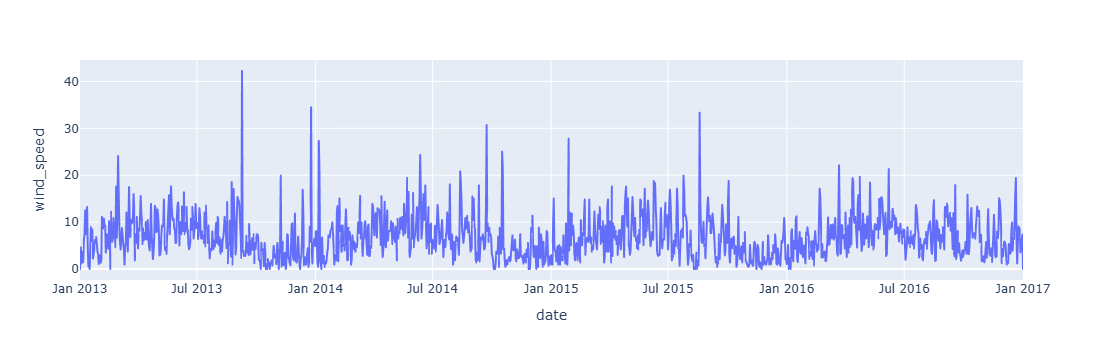

In [10]:
figure=px.line(df,x='date',y='wind_speed')
figure.show()

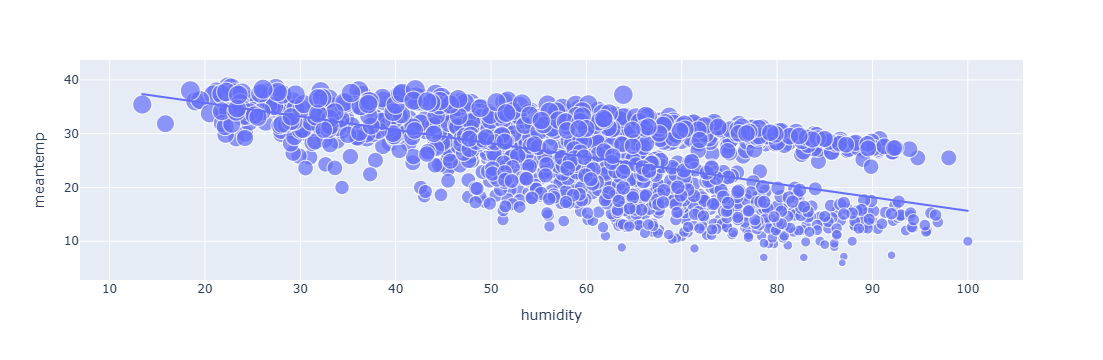

In [13]:
figure=px.scatter(df,x='humidity',y='meantemp',size='meantemp',trendline='ols')
figure.show()

In [14]:
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d')
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month     # Burda obj olan date stününnunu year ve month olarak bölüp yeni stunlar oluşturduk ve date stunu datetime çevirdik

In [15]:
df.head()

date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
 5   year          1462 non-null   int32         
 6   month         1462 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(2)
memory usage: 68.7 KB


<Axes: xlabel='month', ylabel='meantemp'>

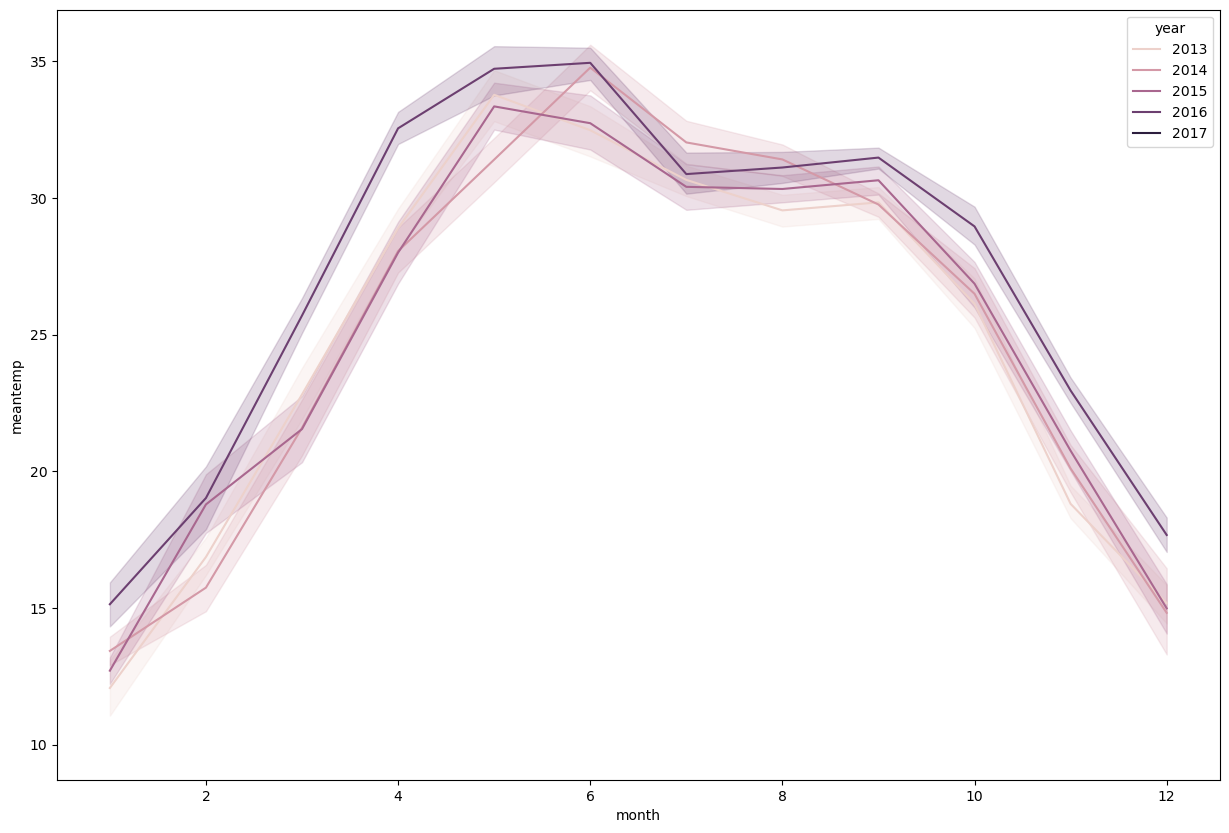

In [19]:
plt.figure(figsize=(15,10))
sns.lineplot(df,x='month',y='meantemp',hue='year')

In [20]:
forecast=df.rename(columns={'date':'ds','meantemp':'y'})

In [21]:
forecast

ds          y    humidity  wind_speed  meanpressure  year  month
0    2013-01-01  10.000000   84.500000    0.000000   1015.666667  2013      1
1    2013-01-02   7.400000   92.000000    2.980000   1017.800000  2013      1
2    2013-01-03   7.166667   87.000000    4.633333   1018.666667  2013      1
3    2013-01-04   8.666667   71.333333    1.233333   1017.166667  2013      1
4    2013-01-05   6.000000   86.833333    3.700000   1016.500000  2013      1
...         ...        ...         ...         ...           ...   ...    ...
1457 2016-12-28  17.217391   68.043478    3.547826   1015.565217  2016     12
1458 2016-12-29  15.238095   87.857143    6.000000   1016.904762  2016     12
1459 2016-12-30  14.095238   89.666667    6.266667   1017.904762  2016     12
1460 2016-12-31  15.052632   87.000000    7.325000   1016.100000  2016     12
1461 2017-01-01  10.000000  100.000000    0.000000   1016.000000  2017      1

[1462 rows x 7 columns]

In [23]:
#pip install prophet 

In [25]:
from prophet import Prophet
from prophet.plot import plot_plotly,plot_components_plotly

In [26]:
model=Prophet()

In [27]:
model.fit(forecast)

10:22:11 - cmdstanpy - INFO - Chain [1] start processing
10:22:11 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
tahmin=model.predict(forecast)

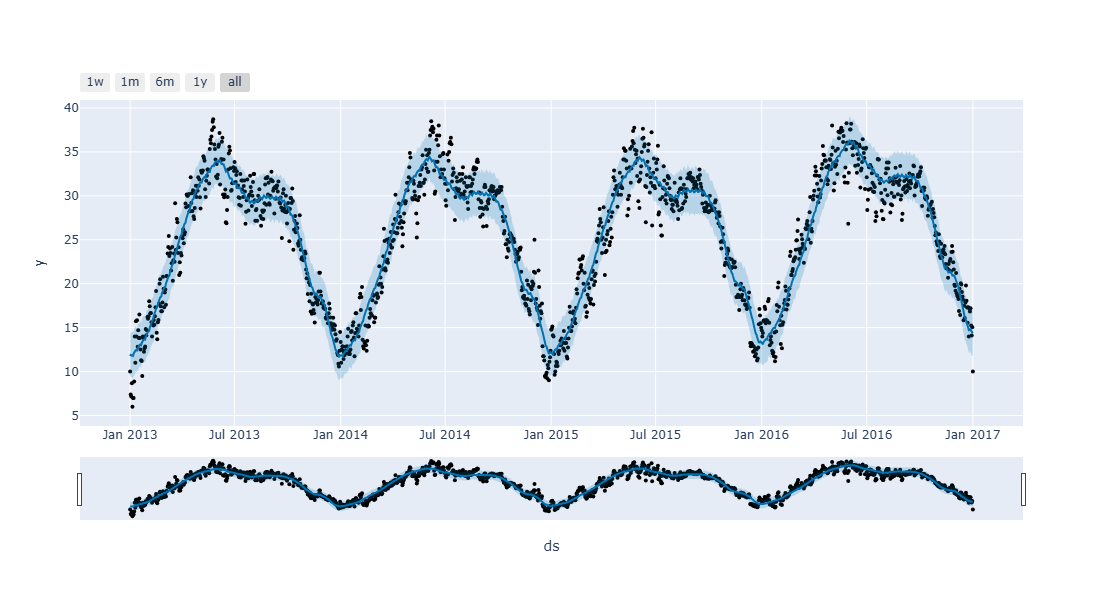

In [29]:
plot_plotly(model,tahmin)

In [30]:
#Mavi çizgi gerçek data noktalar tahminler